This is copied from notebook "20. compare photometry.ipynb"

First this is run:
```
imageDifference.py calexpDir_b1631 --output decamDirTest1 --id visit=289820 ccdnum=11 --templateId visit=288976 --configfile diffimconfig.py --clobber-config --no-versions --config doSubtract=True --config doDecorrelation=True --config detection.thresholdValue=5.0

imageDifference.py calexpDir_b1631 --output decamDirTest2 --id visit=289820 ccdnum=11 --templateId visit=288976 --configfile diffimconfig.py --clobber-config --no-versions --config doSubtract=True --config doDecorrelation=False --config detection.thresholdValue=5.5
```

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

class sizeme():
    """ Class to change html fontsize of object's representation"""
    def __init__(self,ob, size=50, height=120):
        self.ob = ob
        self.size = size
        self.height = height
    def _repr_html_(self):
        repl_tuple = (self.size, self.height, self.ob._repr_html_())
        return u'<span style="font-size:{0}%; line-height:{1}%">{2}</span>'.format(*repl_tuple)

pd.options.display.max_columns = 999

In [46]:
import lsst.daf.persistence as dp
if True:
    butler = dp.Butler('decamDirTest1')
    sources = butler.get('deepDiff_diaSrc',visit=289820,ccdnum=11)
    #print sources[0].extract('ip_diffim_Naive*')

    # df1 will be the corrected one.
    df1 = pd.DataFrame({col: sources.columns[col] for col in sources.schema.getNames()})

if True:
    butler = dp.Butler('decamDirTest2')
    sources = butler.get('deepDiff_diaSrc',visit=289820,ccdnum=11)

    # df2 will be the uncorrected one, run with 5.5-sigma threshold
    df2 = pd.DataFrame({col: sources.columns[col] for col in sources.schema.getNames()})

if True:
    print df1.shape, df2.shape

# Now let's save them out...
if False:
    import cPickle
    import gzip
    cPickle.dump((df1, df2), gzip.GzipFile('twoCatalogs.p.gz', 'wb'))

(50, 183) (143, 183)


Find matches between the two catalogs in RA and Dec.

In [47]:
dist = np.sqrt(np.add.outer(df1.coord_dec, -df2.coord_dec)**2. + \
               np.add.outer(df1.coord_ra, -df2.coord_ra)**2.) * 206264.806247  # convert to arcsec ?
print dist.min(), np.unravel_index(np.argmin(dist), dist.shape), dist[18,48]
print df1.iloc[18].coord_dec, df1.iloc[18].coord_ra, '\t', df2.iloc[48].coord_dec, df2.iloc[48].coord_ra
print np.sum(dist < 4.)
matches = np.where(dist < 4.)
#print matches
print dist[0,0], df1.iloc[0].coord_dec, df1.iloc[0].coord_ra, '\t', df2.iloc[0].coord_dec, df2.iloc[0].coord_ra

# matches1 = df1.iloc[matches[0]]
# matches2 = df2.iloc[matches[1]]

# fluxes1 = matches1.base_PsfFlux_flux.values #matches1.base_CircularApertureFlux_50_0_flux.values
# fluxes2 = matches2.base_PsfFlux_flux.values #matches2.base_CircularApertureFlux_50_0_flux.values

# fluxSigs1 = matches1.base_PsfFlux_fluxSigma.values
# fluxSigs2 = matches2.base_PsfFlux_fluxSigma.values

# isgood = ~np.isnan(fluxes1) & ~np.isnan(fluxes2)
# isgood2 = ~np.isnan(fluxes1) & ~np.isnan(fluxes2) & ~np.isnan(fluxSigs1) & ~np.isnan(fluxSigs2)

# fluxes1 = fluxes1[isgood]
# fluxes2 = fluxes2[isgood]
# fluxSigs1 = np.sqrt(fluxSigs1[isgood2])
# fluxSigs2 = np.sqrt(fluxSigs2[isgood2])

0.000448513220613 (18, 48) 0.000448513220613
-0.104489721008 2.71678863258 	-0.104489718896 2.71678863206
49
0.00597487478386 -0.104245303489 2.7156887146 	-0.104245278038 2.71568870076


In [48]:
# pars, cov = np.polyfit(fluxes2, fluxes1, deg=1, cov=True)
# print pars, np.sqrt(np.diag(cov))
# #print pearsonr(fluxes2, fluxes1)
# print np.nanmedian(fluxes1/fluxes2), np.std(fluxes1/fluxes2)

# pars, cov = np.polyfit(fluxSigs2, fluxSigs1, deg=1, cov=True)
# print pars, np.sqrt(np.diag(cov))
# #print pearsonr(fluxSigs2, fluxSigs1)
# print np.nanmedian(fluxSigs1/fluxSigs2)

# pars, cov = np.polyfit(fluxes2/fluxSigs2, fluxes1/fluxSigs1, deg=1, cov=True)
# print pars, np.sqrt(np.diag(cov))
# #print pearsonr(fluxSigs2, fluxSigs1)
# print np.nanmedian((fluxes1/fluxSigs1)/(fluxes2/fluxSigs2)), np.std((fluxes1/fluxSigs1)/(fluxes2/fluxSigs2))

# plt.figure(1, (12,4))
# plt.subplot(131)
# plt.plot(fluxes2, fluxes1, 'o')
# plt.xlabel('Flux, uncorrected'); plt.ylabel('Flux, corrected')
# #plt.ylim(-10000, 10000)
# plt.subplot(132)
# plt.plot(fluxSigs2, fluxSigs1, 'o')
# plt.xlabel('FluxSigma, uncorrected'); plt.ylabel('FluxSigma, corrected')
# plt.subplot(133)
# plt.plot((fluxes2/fluxSigs2), fluxes1/fluxSigs1, 'o')
# plt.xlabel('SNR, uncorrected'); plt.ylabel('SNR, corrected')
# #plt.ylim(-100, 100); plt.xlim(0, 5)

In [49]:
print sources[0].extract('*_flux').keys()

['base_CircularApertureFlux_70_0_flux', 'ip_diffim_PsfDipoleFlux_neg_flux', 'ip_diffim_DipoleFit_pos_flux', 'base_CircularApertureFlux_6_0_flux', 'slot_PsfFlux_flux', 'base_CircularApertureFlux_35_0_flux', 'base_CircularApertureFlux_50_0_flux', 'base_PsfFlux_flux', 'base_CircularApertureFlux_3_0_flux', 'ip_diffim_NaiveDipoleFlux_pos_flux', 'base_PeakLikelihoodFlux_flux', 'slot_Shape_flux', 'base_CircularApertureFlux_9_0_flux', 'base_SdssShape_flux', 'ip_diffim_NaiveDipoleFlux_neg_flux', 'ip_diffim_DipoleFit_neg_flux', 'base_GaussianFlux_flux', 'ip_diffim_PsfDipoleFlux_pos_flux', 'base_CircularApertureFlux_17_0_flux', 'ip_diffim_DipoleFit_flux', 'base_CircularApertureFlux_12_0_flux', 'base_CircularApertureFlux_4_5_flux', 'slot_ApFlux_flux', 'base_CircularApertureFlux_25_0_flux']


(array([ 1.01284551,  8.17358404]), 1.0198515338920817, array([ 0.83134128,  5.35562608]), 1.1480744849344806, array([ 0.87200798,  1.54546631]), 0.90609086870452737)
                               slot	       flux	    fluxSig	        SNR
base_CircularApertureFlux_70_0_flux	0.960 0.961	1.145 1.159	0.689 0.829
   ip_diffim_PsfDipoleFlux_neg_flux	3.555 1.295	1.207 1.480	3.183 1.116
       ip_diffim_DipoleFit_pos_flux	1.044 1.030	1.030 1.020	1.029 0.997
 base_CircularApertureFlux_6_0_flux	0.958 0.974	0.530 1.159	0.854 0.860
base_CircularApertureFlux_35_0_flux	0.946 0.957	1.158 1.159	0.824 0.825
base_CircularApertureFlux_50_0_flux	0.959 0.961	1.159 1.159	0.776 0.829
                  base_PsfFlux_flux	1.013 1.020	0.831 1.148	0.872 0.906
 base_CircularApertureFlux_3_0_flux	1.059 1.044	1.145 1.159	0.907 0.905
 ip_diffim_NaiveDipoleFlux_pos_flux	0.792 1.075	0.887 1.018	0.836 1.056
       base_PeakLikelihoodFlux_flux	1.275 1.201	1.125 1.191	1.043 1.009
 base_CircularApertureFlux_9_0_flux	0.847

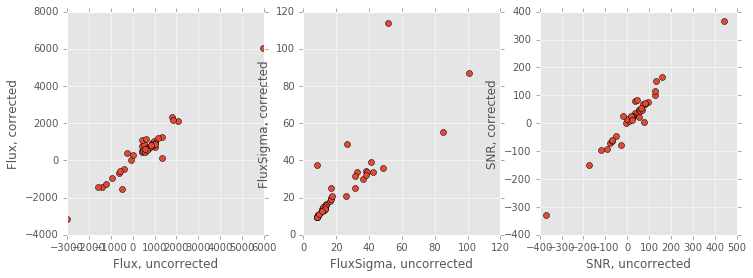

In [51]:
def computeRatios(key, matches1, matches2, plot=False):
    fluxes1 = matches1[key].values #matches1.base_CircularApertureFlux_50_0_flux.values
    fluxes2 = matches2[key].values #matches2.base_CircularApertureFlux_50_0_flux.values

    fluxSigs1 = matches1[key+'Sigma'].values
    fluxSigs2 = matches2[key+'Sigma'].values

    isgood = ~np.isnan(fluxes1) & ~np.isnan(fluxes2)
    isgood2 = ~np.isnan(fluxes1) & ~np.isnan(fluxes2) & ~np.isnan(fluxSigs1) & ~np.isnan(fluxSigs2)

    fluxes1 = fluxes1[isgood]
    fluxes2 = fluxes2[isgood]
    fluxSigs1 = np.sqrt(fluxSigs1[isgood2])
    fluxSigs2 = np.sqrt(fluxSigs2[isgood2])
    
    pars1, cov = np.polyfit(fluxes2, fluxes1, deg=1, cov=True)
    #print pars1, np.sqrt(np.diag(cov))
    #print pearsonr(fluxes2, fluxes1)
    med1, std1 = np.nanmedian(fluxes1/fluxes2), np.std(fluxes1/fluxes2)

    pars2, cov = np.polyfit(fluxSigs2, fluxSigs1, deg=1, cov=True)
    #print pars2, np.sqrt(np.diag(cov))
    #print pearsonr(fluxSigs2, fluxSigs1)
    med2 = np.nanmedian(fluxSigs1/fluxSigs2)

    pars3, cov = np.polyfit(fluxes2/fluxSigs2, fluxes1/fluxSigs1, deg=1, cov=True)
    #print pars3, np.sqrt(np.diag(cov))
    #print pearsonr(fluxSigs2, fluxSigs1)
    med3, std3 = np.nanmedian((fluxes1/fluxSigs1)/(fluxes2/fluxSigs2)), np.std((fluxes1/fluxSigs1)/(fluxes2/fluxSigs2))

    if plot:
        plt.figure(1, (12,4))
        plt.subplot(131)
        plt.plot(fluxes2, fluxes1, 'o')
        plt.xlabel('Flux, uncorrected'); plt.ylabel('Flux, corrected')
        #plt.ylim(-10000, 10000)
        plt.subplot(132)
        plt.plot(fluxSigs2, fluxSigs1, 'o')
        plt.xlabel('FluxSigma, uncorrected'); plt.ylabel('FluxSigma, corrected')
        plt.subplot(133)
        plt.plot((fluxes2/fluxSigs2), fluxes1/fluxSigs1, 'o')
        plt.xlabel('SNR, uncorrected'); plt.ylabel('SNR, corrected')
        #plt.ylim(-100, 100); plt.xlim(0, 5)
        
    return pars1, med1, pars2, med2, pars3, med3

print computeRatios('base_PsfFlux_flux', matches1, matches2, plot=True)

print "%35s\t%11s\t%11s\t%11s" % ('slot', 'flux', 'fluxSig', 'SNR')

for key in sources[0].extract('*_flux').keys():
    if key.startswith('slot_'):
        continue
    try:
        vals = computeRatios(key, matches1, matches2, plot=False)
        print "%35s\t%.3f %.3f\t%.3f %.3f\t%.3f %.3f" % (key, vals[0][0], vals[1], vals[2][0], vals[3], vals[4][0], vals[5])
    except:
        print "%35s" % (key)

In [39]:
print np.mean(df1.ip_diffim_DipoleFit_flag_classification.values)
print np.mean(df2.ip_diffim_DipoleFit_flag_classification.values)
print np.mean(matches1.ip_diffim_DipoleFit_flag_classification.values)
print np.mean(matches2.ip_diffim_DipoleFit_flag_classification.values)
print;
print np.mean(df1.ip_diffim_ClassificationDipole_value)
print np.mean(df2.ip_diffim_ClassificationDipole_value)
print np.mean(matches1.ip_diffim_ClassificationDipole_value)
print np.mean(matches2.ip_diffim_ClassificationDipole_value)

0.2
0.0839160839161
0.204081632653
0.244897959184

0.14
0.0559440559441
0.142857142857
0.163265306122


Let's try to make the plot in Colin's DMTN-006 -- first run his script

```
python forcePhotDiaSources.py decamDirTest1 --output decamDirTest1 --id visit=289820 ccdnum=11 --templateId visit=288976 --no-versions
```

then...

In [40]:
import lsst.daf.persistence as dp
butler=dp.Butler('decamDirTest1')
sources=butler.get('forced_src',visit=289820,ccdnum=11)
df = pd.DataFrame({col: sources.columns[col] for col in sources.schema.getNames()})
print df.shape
sizeme(df.head())

(50, 17)


,base_PsfFlux_flag,base_PsfFlux_flag_edge,base_PsfFlux_flag_noGoodPixels,base_PsfFlux_flux,base_PsfFlux_fluxSigma,base_TransformedCentroid_flag,base_TransformedCentroid_x,base_TransformedCentroid_y,classification_dipole,coord_dec,coord_ra,diffim_base_PsfFlux_flux,diffim_base_PsfFlux_fluxSigma,objectId,parentObjectId,template_base_PsfFlux_flux,template_base_PsfFlux_fluxSigma
0,False,False,False,11402.671047,89.060454,False,1397.283325,36.974789,0,-0.104245,2.715689,NaN,NaN,124476789417312318,0,12966.984661,82.876483
1,False,False,False,17276.202225,148.566598,False,762.302063,81.918633,0,-0.103438,2.715746,-968.636060,179.460633,124476789417312319,0,19549.001016,93.088274
2,False,False,False,7450.233416,79.866487,False,461.621613,167.564728,0,-0.103056,2.715855,540.772368,115.619059,124476789417312320,0,6738.646987,67.922069
3,False,False,False,41713.357043,125.714742,False,612.939148,208.854706,0,-0.103248,2.715908,935.644564,189.519786,124476789417312321,0,39815.460800,122.876648
4,False,False,False,18078.089417,101.525175,False,780.099426,412.828247,0,-0.103460,2.716169,1237.202307,153.359418,124476789417312322,0,18540.504999,155.166339


In [41]:
df[['base_PsfFlux_flux', 'template_base_PsfFlux_flux']].head()
df['s_to_n'] = df.base_PsfFlux_flux / df.base_PsfFlux_fluxSigma
df['template_s_to_n'] = df.template_base_PsfFlux_flux / df.template_base_PsfFlux_fluxSigma
print df.columns.values
df[['s_to_n', 'template_s_to_n']].head()

['base_PsfFlux_flag' 'base_PsfFlux_flag_edge'
 'base_PsfFlux_flag_noGoodPixels' 'base_PsfFlux_flux'
 'base_PsfFlux_fluxSigma' 'base_TransformedCentroid_flag'
 'base_TransformedCentroid_x' 'base_TransformedCentroid_y'
 'classification_dipole' 'coord_dec' 'coord_ra' 'diffim_base_PsfFlux_flux'
 'diffim_base_PsfFlux_fluxSigma' 'objectId' 'parentObjectId'
 'template_base_PsfFlux_flux' 'template_base_PsfFlux_fluxSigma' 's_to_n'
 'template_s_to_n']


,s_to_n,template_s_to_n
0,128.032932,156.461571
1,116.285911,210.004978
2,93.283600,99.211451
3,331.809590,324.027888
4,178.065091,119.487933


Make a plot similar to Colin's [Figure 6 in DMTN-006](http://dmtn-006.lsst.io/en/latest/#forcephot-sci-template-v197367)

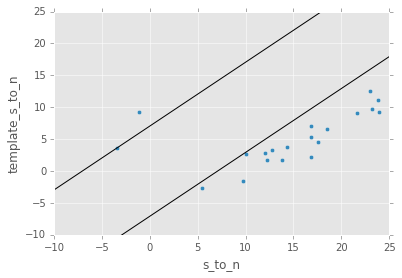

In [42]:
df.plot.scatter('s_to_n', 'template_s_to_n')
plt.xlim(-10, 25)
plt.ylim(-10, 25)
x = np.linspace(-25,25)
plt.plot(x, x-5*np.sqrt(2), 'k-')
plt.plot(x, x+5*np.sqrt(2), 'k-')